# Data Preprocessing Tools

## 1. Importing the Libraries

In [1]:
import numpy as np ##allows us to work with arrays
import matplotlib.pyplot as plt ##allows us to plot charts 
import pandas as pd ##import csv dataset

## 2. Importing the dataset

In [2]:
## In any dataset used for training a model, you will have entities called as features and dependent variable vector
## For Supervised learning models, you will have to decide and select the independent variables - features and dependent variable
## Features are the columns using which we are going to predicit the dependent variable


dataset = pd.read_csv('Data.csv')

X = dataset.iloc[:,:-1].values ## Matrix of independent variables
y = dataset.iloc[:,-1].values ## Dependent Variable

In [4]:
print(X)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## 3. Taking Care of Missing Data

In [3]:
## The imputer uses mean, median and most_frequent strategy to fit and transform the missing field with corresponding value 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding Categorical Data

## 4. Encoding Independent Variable

In [34]:
## This will encode features with string values or categories into number of columns for each category with a value 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## 5. Encoding Dependent Variable

In [7]:
## Label Encoder can be used on a feature having 2 catergories 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [13]:
print(X)
print(y)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
[0 1 0 0 1 1 0 1 0 1]


### Why feature scaling after splitting data into training and test set ??

## 6. Splitting the data into the training set and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
print(X_train[:,3:5])

[[38.77777777777778 52000.0]
 [40.0 63777.77777777778]
 [44.0 72000.0]
 [38.0 61000.0]
 [27.0 48000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [35.0 58000.0]]


## 7. Feature Scaling - It is a technique to standardize/normalize independent variables of the data in the fixed range. 

## If feature scaling is not done, the algorithm tend to consider higher values, higher and lower values, lower regardless of the unit of the values.

## Example - It can consider the value 3000 meter to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions

## Techniques to perform feature scaling - 

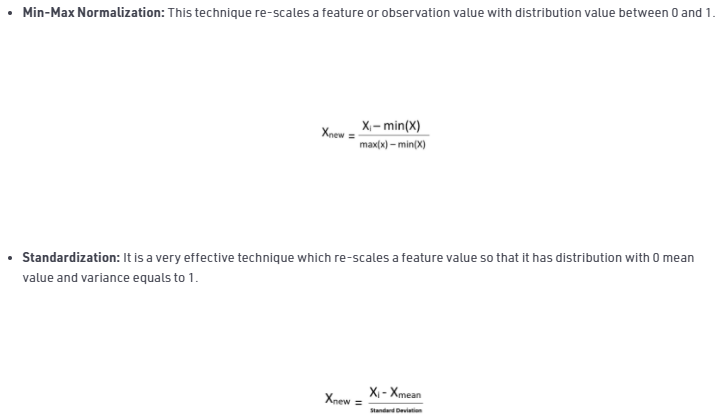

Which one to prefer ?

Standardization techniques works in all the cases, where as Normalization suits for some

In [31]:
## Feature Scaling
## Do not apply feature scaling on the features in training set that have been already transformed for better outcome.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

In [33]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
